<h1 align='center'>Investiție la bursa istorică (Backtesting) folosind SMA(Simple Moving Average) și RSI(Relative Strength Index) + BOLLINGER BANDS (RSIBB)</h1>

<h2 align='justify'>Includerea (importarea) de librării necesare executării programului</h2>

In [264]:
import numpy as np
#Pentru structuri de date de tip tablou si operatii matematice complexe

import pandas as pd
#Pentru manipularea datelor organizate sub forma de tabel precum datele despre o companie

import matplotlib.pyplot as plt
#Pentru reprezentarea grafica a informatiilor

import yfinance as yf
#Obtinerea datelor despre actiuni folosind Yahoo Finance

<h2 align='justify'>Downloadarea datelor despre o companie</h2>
<p align='justify'>&nbsp;&nbsp;&nbsp;&nbsp;Ca exemplu, am folosit datele despre compania AAPL (Apple Inc.)</p>

In [265]:
n = 10 # Pe cati ani se face investitia

n = n * 365 # Transformat in zile

start_date = pd.to_datetime("today") - pd.Timedelta(n, unit='D') # Din prezent scad n ani

start_date = start_date.strftime("%Y-%d-%m") # Formatul necesar pentru yfinance : an/zi/luna

end_date = pd.to_datetime("today").strftime("%Y-%d-%m")
#Nu se vor lua in calcul ultimele 2-3 zile pentru ca nu am Yahoo premium

data = yf.download('AAPL',start = start_date,end = end_date)
#Functia download primeste mai multi parametri printre care simbolul companiei si datele de inceput
#si sfarsit pentru care se realizeaza cautarea informatiilor

data
#Afisarea variabilei

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-05,15.160714,15.176786,14.988571,15.114286,13.053923,383695200
2013-04-08,15.173214,15.267857,15.088929,15.221786,13.146770,300829200
2013-04-09,15.227143,15.303571,15.098214,15.249286,13.170520,306614000
2013-04-10,15.289286,15.609286,15.214643,15.560357,13.439185,375928000
2013-04-11,15.490000,15.642500,15.400000,15.511786,13.397239,328364400
...,...,...,...,...,...,...
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.070023,65874500
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.208282,77663600


<h2 align='center'>Implementarea și reprezentarea grafică a strategiei Moving Average Crossover</h2>
<p></p>

In [266]:
# Descriere:
# Cand media aritmetica mobila pe o perioada mai scurta este sub media aritmetica mobila pe o perioada mai lunga atunci
# se pot cumpara actiuni, altfel se pot vinde actiuni.

<h2 align='justify'>Funcție pentru calcularea SMA (medie aritmetică mobilă)</h2>

In [267]:
def SMA(data, period, column = 'Close'):
    return data[column].rolling(period).mean()

<h2 align='justify'>Adăugarea de noi coloane în structura de date și ștergerea celor utilizate</h2>

In [268]:
data['Short_SMA'] = SMA(data,50)
#Short SMA, adica pe o perioada mai scurta de zile

data['Long_SMA'] = SMA(data,100)
#Long SMA, adica pe o perioada mai lunga de zile

data.drop(columns=["Open","High","Low","Adj Close", "Volume"], inplace = True)

data

,Close,Short_SMA,Long_SMA
Date,,,
2013-04-05,15.114286,NaN,NaN
2013-04-08,15.221786,NaN,NaN
2013-04-09,15.249286,NaN,NaN
2013-04-10,15.560357,NaN,NaN
2013-04-11,15.511786,NaN,NaN
...,...,...,...
2023-01-30,143.000000,138.965799,143.194499
2023-01-31,144.289993,138.875799,143.077799
2023-02-01,145.429993,138.769999,142.987499


<h2 align="justify">Strategia propriu zisă</h2>

In [269]:
def strategy(data):
    #Listele sunt initial vide.
    buy = []
    sell = []
    sum = []
    s = 1000 # investitia initiala
    nr_actiuni = 0 # numar de actiuni per companie
    for i in range(0, len(data)):
        if data['Short_SMA'][i] < data['Long_SMA'][i] and s > data['Close'][i]:
            # semnal de cumparare
            s = s - data['Close'][i]
            nr_actiuni = nr_actiuni + 1
            buy.append(data['Close'][i])
            sell.append(np.nan)
        elif data['Short_SMA'][i] > data['Long_SMA'][i] and nr_actiuni != 0:
            # semnal de vanzare
            s = s + data['Close'][i]
            nr_actiuni = nr_actiuni - 1
            buy.append(np.nan)
            sell.append(data['Close'][i])
        else:
            buy.append(np.nan)
            sell.append(np.nan)
        sum.append(s + data['Close'][i] * nr_actiuni)
    return (buy, sell, sum)

<h3 align="justify">Adăugarea de informații în structura de date pentru a putea fi reprezentate grafic</h3>
<p align="justify">S-au adăugat atât prețul de cumpărare și de vânzare, cât și suma pe parcursul investițiilor și s-au afișat pe ecran.</p>

In [270]:
strat = strategy(data)
data['Buy'] = strat[0]
data['Sell'] = strat[1]
data['Sum'] = strat[2]

data

,Close,Short_SMA,Long_SMA,Buy,Sell,Sum
Date,,,,,,
2013-04-05,15.114286,NaN,NaN,NaN,NaN,1000.000000
2013-04-08,15.221786,NaN,NaN,NaN,NaN,1000.000000
2013-04-09,15.249286,NaN,NaN,NaN,NaN,1000.000000
2013-04-10,15.560357,NaN,NaN,NaN,NaN,1000.000000
2013-04-11,15.511786,NaN,NaN,NaN,NaN,1000.000000
...,...,...,...,...,...,...
2023-01-30,143.000000,138.965799,143.194499,NaN,NaN,1669.493900
2023-01-31,144.289993,138.875799,143.077799,NaN,NaN,1683.683826
2023-02-01,145.429993,138.769999,142.987499,NaN,NaN,1696.223820


<h2 align="justify">Reprezentarea grafică</h2>

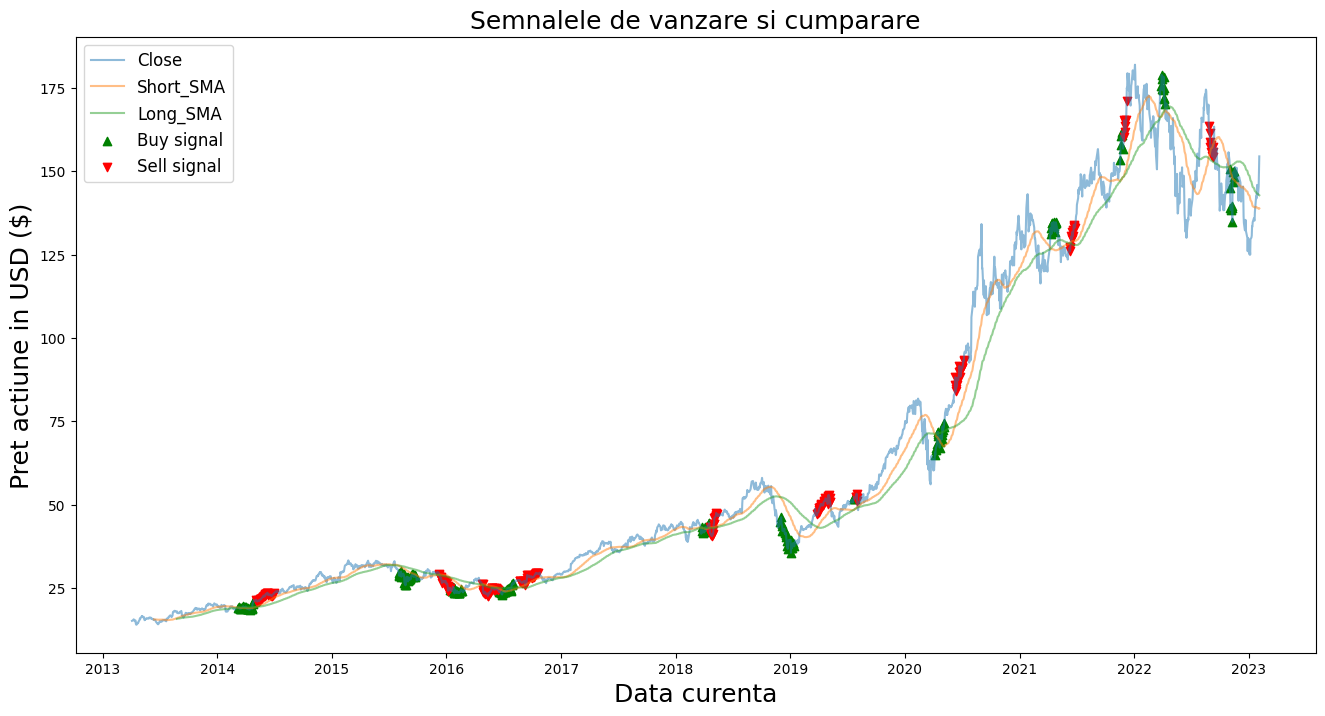

In [271]:
plt.figure(figsize = (16, 8))
plt.plot(data['Close'],alpha = 0.5,label = 'Close')
plt.plot(data['Short_SMA'],alpha = 0.5,label = 'Short_SMA')
plt.plot(data['Long_SMA'],alpha = 0.5,label = 'Long_SMA')
plt.scatter(data.index,data['Buy'],color = 'green',label = 'Buy signal', marker = '^',alpha = 1)
plt.scatter(data.index,data['Sell'],color = 'red',label = 'Sell signal',marker = 'v',alpha = 1)
plt.title("Semnalele de vanzare si cumparare",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Pret actiune in USD ($)",fontsize = 18)
plt.legend(loc="upper left",fontsize = 12)
plt.show()

<h2 align="justify">Afișarea rezultatelor strategiei SMA Crossover</h2>

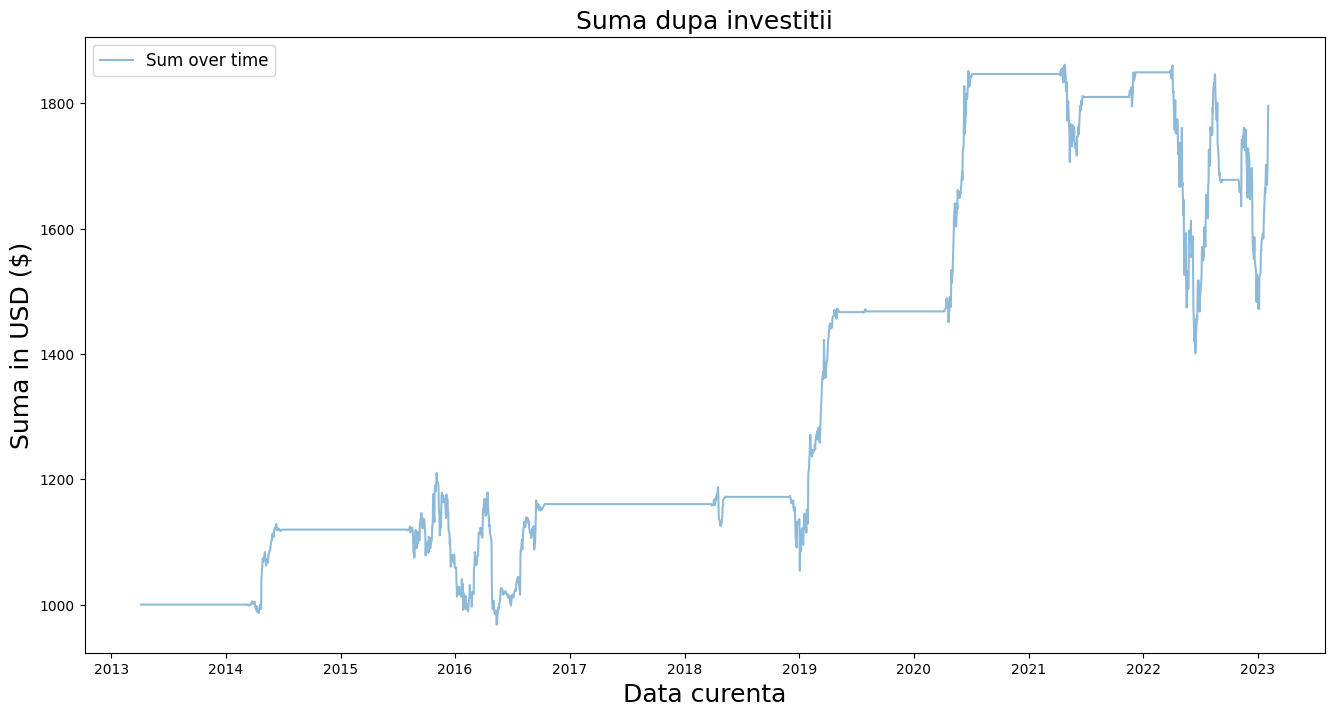

Suma maxima pe parcursul investitiilor: 1861.30 $
Suma minima pe parcursul investitiilor: 967.95 $
Suma totala dupa toate investitiile este: 1795.99 $


In [272]:
plt.figure(figsize = (16, 8))
plt.plot(data['Sum'],alpha = 0.5, label = 'Sum over time')
plt.title("Suma dupa investitii",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Suma in USD ($)",fontsize = 18)
plt.legend(loc = "upper left",fontsize = 12)
plt.show()
maxim_sma=data['Sum'][0]
minim_sma=data['Sum'][0]
for i in range(0,len(data)):
    if(maxim_sma > data['Sum'][i]):
        maxim_sma = data['Sum'][i]
    if(minim_sma < data['Sum'][i]):
        minim_sma = data['Sum'][i]
total_sma = data['Sum'][len(data)-1]
#Afisarea rezultatelor cu doua zecimale
#Aceste sume includ si valorile actiunilor detinute
print(f"Suma maxima pe parcursul investitiilor: {format(minim_sma,'.2f')} $")
print(f"Suma minima pe parcursul investitiilor: {format(maxim_sma,'.2f')} $")
print(f"Suma totala dupa toate investitiile este: {format(total_sma,'.2f')} $")

<h2 align="center">Implementarea și reprezentarea grafică a strategiei RSI + BB</h2>

In [273]:
# Descriere:
# Cand RSI este Oversold si ne aflam sub LowerBand se pot cumpara actiuni, altfel daca RSI este Overbought si ne aflam
# peste UpperBand se pot vinde actiuni

<h2 align="justify">Funcție pentru calcularea Bollinger Bands</h2>
<p>&nbsp;&nbsp;&nbsp;&nbsp;În esență, Bollinger Bands (benzi Bollinger) sunt medii aritmetice cărora li s-a adăugat / scăzut standard deviation (abatere standard pentru minimizarea riscului)</p>

In [274]:
def bollinger_bands(data, period):
    rolling_mean = data['Close'].rolling(period).mean() # SMA
    rolling_std = data['Close'].rolling(period).std() # Standard deviation
    data['UpperBand'] = rolling_mean + (2 * rolling_std)
    data['LowerBand'] = rolling_mean - (2 * rolling_std)
    return data


<h2 align="justify">Funcție pentru calcularea RSI(Relative Strength Index)</h2>
<p>&nbsp;&nbsp;&nbsp;&nbsp;Indicele de putere relativă măsoară viteza și amploarea mișcărilor prețului unei acțiuni</p>

In [275]:
def RSI(data, period):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    RS = avg_gain / avg_loss
    RSI = 100 - (100 / (1 + RS))
    data['RSI'] = RSI
    data['Overbought'] = 70
    data['Oversold'] = 30
    return data

<h2 align="justify">Apelul funcțiilor pentru a crea noi coloane în structura de date</h2>

In [276]:
data = bollinger_bands(data, 30)

data = RSI(data, 13)

<h2 align="justify">Strategia propriu zisă</h2>

In [277]:
def RSIBBstrategy(data):
    #Listele sunt initial vide
    buy = []
    sell = []
    sum = []
    s = 1000 # investitia initiala
    nr_actiuni = 0 # numar de actiuni per companie
    for i in range(0,len(data)):
        if data['Close'][i] < data['LowerBand'][i] and data['RSI'][i] < data['Oversold'][i] and s > data['Close'][i]:
            #semnal de cumparare
            s = s - data['Close'][i]
            nr_actiuni = nr_actiuni + 1
            buy.append(data['Close'][i])
            sell.append(np.nan)
        elif data['Close'][i] > data['UpperBand'][i] and data['RSI'][i] > data['Overbought'][i] and nr_actiuni != 0:
            #semnal de vanzare
            s = s + data['Close'][i]
            nr_actiuni = nr_actiuni - 1
            buy.append(np.nan)
            sell.append(data['Close'][i])
        else:
            buy.append(np.nan)
            sell.append(np.nan)
        sum.append(s + data['Close'][i] * nr_actiuni)
    return (buy, sell, sum)

<h3 align="justify">Adăugarea de informații în structura de date pentru a putea fi reprezentate grafic</h3>
<p align="justify">S-au adăugat atât prețul de cumpărare și de vânzare, cât și suma pe parcursul investițiilor și s-au afișat pe ecran.</p>

In [278]:
strat = RSIBBstrategy(data)

data['RSIBB_Buy'] = strat[0]
data['RSIBB_Sell'] = strat[1]
data['RSIBB_Sum'] = strat[2]

data

,Close,Short_SMA,Long_SMA,Buy,Sell,Sum,UpperBand,LowerBand,RSI,Overbought,Oversold,RSIBB_Buy,RSIBB_Sell,RSIBB_Sum
Date,,,,,,,,,,,,,,
2013-04-05,15.114286,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-04-08,15.221786,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-04-09,15.249286,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-04-10,15.560357,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
2013-04-11,15.511786,NaN,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN,70,30,NaN,NaN,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,143.000000,138.965799,143.194499,NaN,NaN,1669.493900,145.401180,122.740152,135.941213,70,30,NaN,NaN,1540.859326
2023-01-31,144.289993,138.875799,143.077799,NaN,NaN,1683.683826,146.233789,122.426875,140.833272,70,30,NaN,NaN,1552.469266
2023-02-01,145.429993,138.769999,142.987499,NaN,NaN,1696.223820,147.269428,122.119237,136.023216,70,30,NaN,NaN,1562.729260


<h2 align="justify">Reprezentarea grafică</h2>

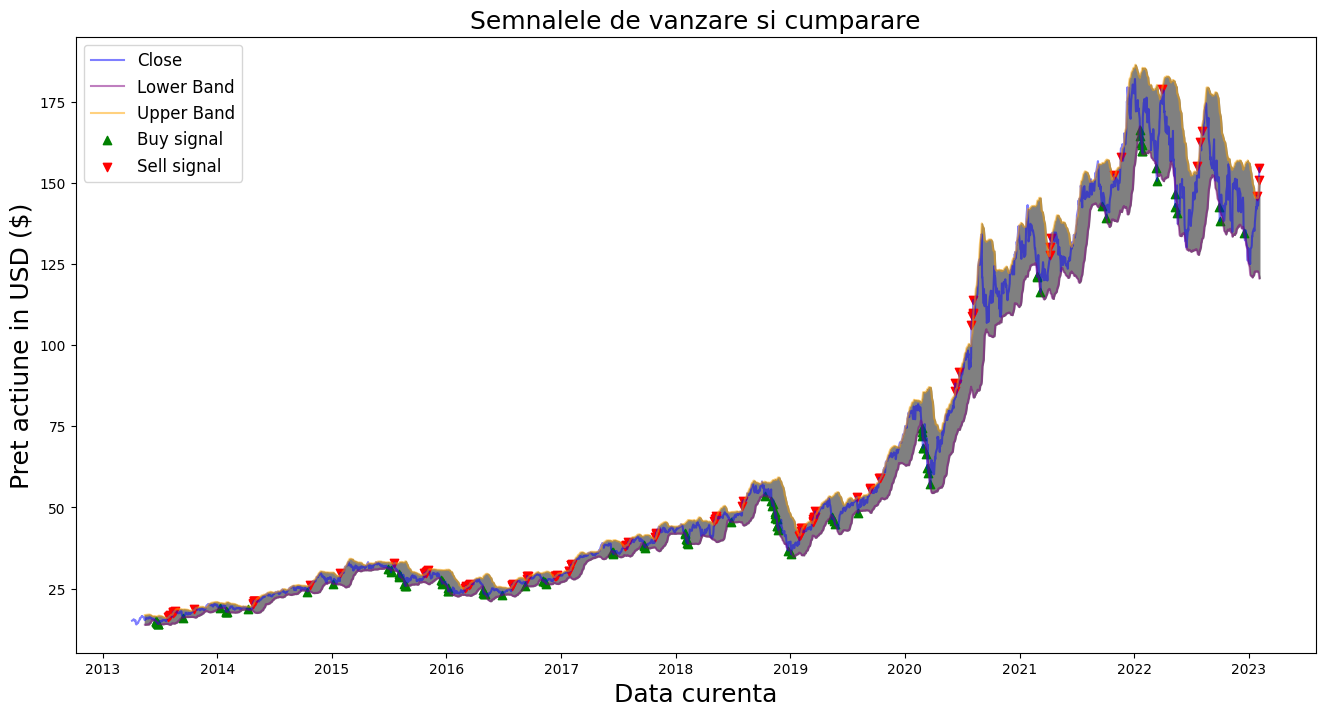

In [279]:
plt.figure(figsize = (16, 8))
plt.plot(data['Close'],alpha = 0.5,label = 'Close',color = 'blue')
plt.plot(data['LowerBand'],alpha = 0.5,label = 'Lower Band',color = 'purple')
plt.plot(data['UpperBand'],alpha = 0.5,label = 'Upper Band',color = 'orange')
plt.fill_between(data.index, data['UpperBand'],data['LowerBand'],color = 'grey')
plt.scatter(data.index,data['RSIBB_Buy'],color = 'green',label = 'Buy signal', marker = '^',alpha = 1)
plt.scatter(data.index,data['RSIBB_Sell'],color = 'red',label = 'Sell signal',marker = 'v',alpha = 1)
plt.title("Semnalele de vanzare si cumparare",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Pret actiune in USD ($)", fontsize = 18)
plt.legend(loc="upper left",fontsize = 12)
plt.show()

<h2 align="justify">Afișarea rezultatelor strategiei RSI + BB</h2>

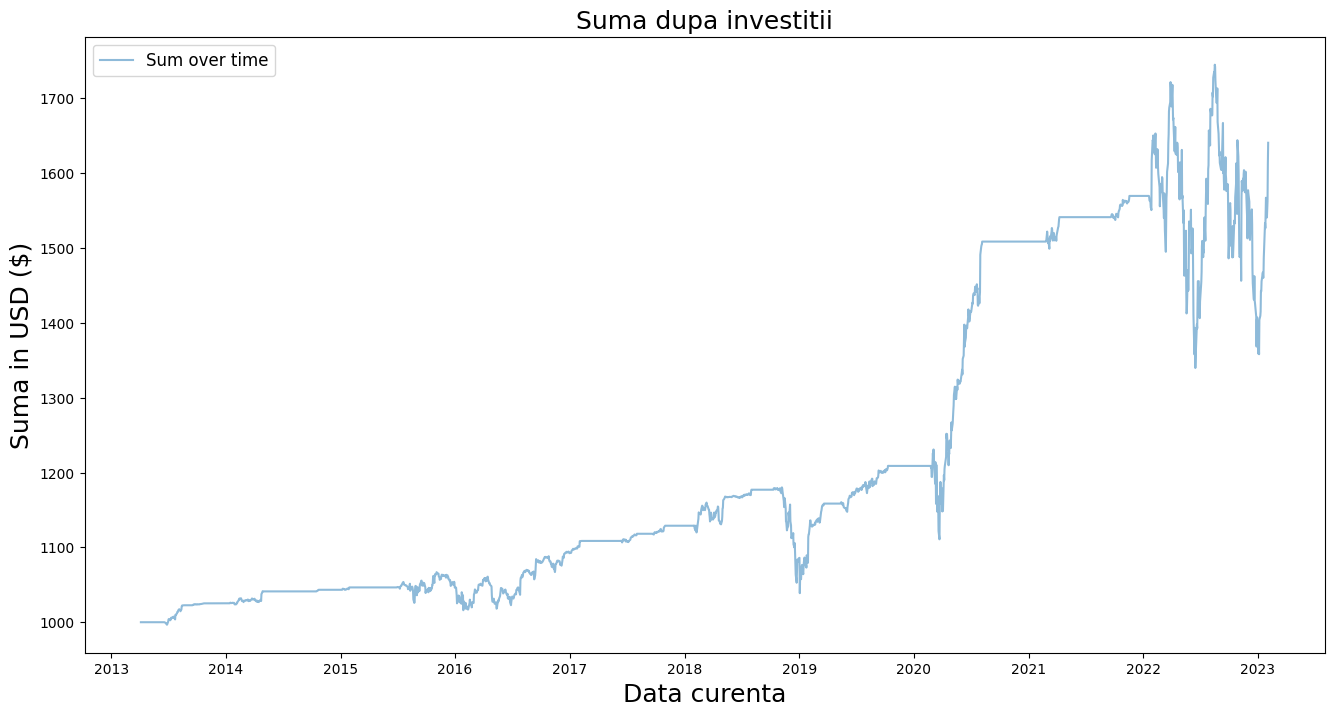

Suma maxima pe parcursul investitiilor: 1744.97 $
Suma minima pe parcursul investitiilor: 996.65 $
Suma totala dupa toate investitiile este: 1640.68 $


In [280]:
plt.figure(figsize = (16, 8))
plt.plot(data['RSIBB_Sum'],alpha = 0.5, label = 'Sum over time')
plt.title("Suma dupa investitii",fontsize = 18)
plt.xlabel("Data curenta",fontsize = 18)
plt.ylabel("Suma in USD ($)",fontsize = 18)
plt.legend(loc = "upper left",fontsize = 12)
plt.show()
maxim_rsibb=data['RSIBB_Sum'][0]
minim_rsibb=data['RSIBB_Sum'][0]
for i in range(0,len(data)):
    if(maxim_rsibb> data['RSIBB_Sum'][i]):
        maxim_rsibb= data['RSIBB_Sum'][i]
    if(minim_rsibb< data['RSIBB_Sum'][i]):
        minim_rsibb= data['RSIBB_Sum'][i]
total_rsibb= data['RSIBB_Sum'][len(data)-1]
#Afisarea rezultatelor cu doua zecimale
#Aceste sume includ si valorile actiunilor detinute
print(f"Suma maxima pe parcursul investitiilor: {format(minim_rsibb,'.2f')} $")
print(f"Suma minima pe parcursul investitiilor: {format(maxim_rsibb,'.2f')} $")
print(f"Suma totala dupa toate investitiile este: {format(total_rsibb,'.2f')} $")